In [1]:
import mlrose_hiive as mlrose
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import time
import random as rn
import os
import time
import sys
%matplotlib inline

In [2]:
"""
Setting up seed values for reproducability
"""
starting_seed = 1234
seed_values = []

for i in range(0, 5):
    seed_values.append(starting_seed + i)

# np.random.seed(seed)
# rn.seed(seed)
# os.environ['PYTHONHASHSEED'] = str(seed)

# First run

Trying the different algorithms on the optimization problem with differing problem sizes before messing with the hyperparameters and the different iterations amounts.

In [17]:
"""
Main custom runner for the KnapSack optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparameters All
max_weight_pct = 0.25

# Hyperparamters RHC
max_attempts_rhc = 100
max_iters_rhc = 150
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100
max_iters_sa = 150

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100
max_iters_ga = 150

# Hyperparameters MIMIC
pop_size_mimic = 1000
keep_pct = 0.2
max_attempts_mimic = 100
max_iters_mimic = 150
noise = 0.1

problem_sizes = [1 * i for i in range(0, 105, 5)]
problem_sizes.pop(0)

rhc_data_problem_sizes = []
sa_data_problem_sizes = []
ga_data_problem_sizes = []
mimic_data_problem_sizes = []

# Want to loop across the different problem sizes
for problem_size in problem_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    
    print(f"Running problem size {problem_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_weights = np.random.randint(1, problem_size, size=problem_size)
        initial_values = np.random.randint(1, problem_size, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.Knapsack(initial_weights, initial_values, max_weight_pct)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = 2
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=max_iters_rhc,
            restarts=restarts,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=max_iters_sa,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=max_iters_ga,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(best_fitness)
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=max_iters_mimic,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            noise=noise,
            random_state=seed
        )
        
        end = time.time()
        mimic_data_avg.append(best_fitness)
        
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC best avg fitness {rhc_avg}")
    rhc_data_problem_sizes.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA best avg fitness {sa_avg}")
    sa_data_problem_sizes.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA best avg fitness {ga_avg}")
    ga_data_problem_sizes.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC best avg fitness {mimic_avg}")
    mimic_data_problem_sizes.append(mimic_avg)
    
    print("====================================================")


Running problem size 5!
RHC best avg fitness 7.0
SA best avg fitness 6.8
GA best avg fitness 7.0
MIMIC best avg fitness 7.0
Running problem size 10!
RHC best avg fitness 26.6
SA best avg fitness 21.6
GA best avg fitness 29.8
MIMIC best avg fitness 29.8
Running problem size 15!
RHC best avg fitness 56.0
SA best avg fitness 54.0
GA best avg fitness 64.0
MIMIC best avg fitness 64.0
Running problem size 20!
RHC best avg fitness 92.2
SA best avg fitness 61.4
GA best avg fitness 119.6
MIMIC best avg fitness 115.4
Running problem size 25!
RHC best avg fitness 130.6
SA best avg fitness 68.2
GA best avg fitness 190.8
MIMIC best avg fitness 175.2
Running problem size 30!
RHC best avg fitness 157.6
SA best avg fitness 52.8
GA best avg fitness 262.6
MIMIC best avg fitness 236.2
Running problem size 35!
RHC best avg fitness 197.8
SA best avg fitness 135.0
GA best avg fitness 367.6
MIMIC best avg fitness 324.0
Running problem size 40!
RHC best avg fitness 272.6
SA best avg fitness 57.2
GA best avg f

KeyboardInterrupt: 

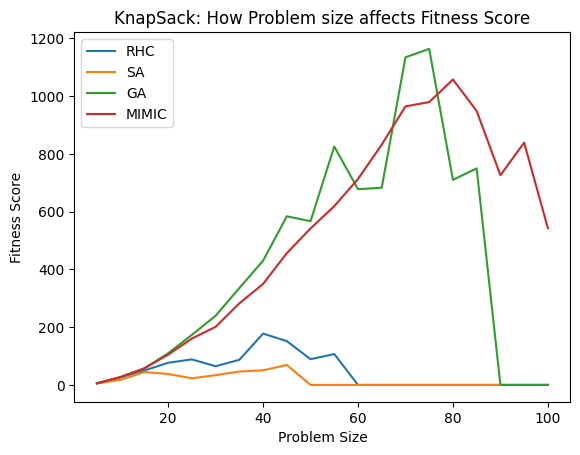

In [16]:
"""
Plotting the fitness score (Y axis) to problem size (X axis) for KnapSack
"""

plt.plot(problem_sizes, rhc_data_problem_sizes, label = 'RHC')
plt.plot(problem_sizes, sa_data_problem_sizes, label = 'SA')
plt.plot(problem_sizes, ga_data_problem_sizes, label = 'GA')
plt.plot(problem_sizes, mimic_data_problem_sizes, label = 'MIMIC')

plt.xlabel("Problem Size")
plt.ylabel("Fitness Score")
plt.title("KnapSack: How Problem size affects Fitness Score")
plt.legend()
plt.show()

# Now trying with different iteration sizes with a fixed problem size

It seems that the difference between the curves happen when the problem size reaches around 60 bits. For this iteration we will set the problem size to 60 and try out different iteration sizes to see how it changes the fitness score.

In [21]:
"""
Main custom runner for the KnapSack optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparameters All
max_weight_pct = 0.25
problem_size = 85

# Hyperparamters RHC
max_attempts_rhc = 100
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100

# Hyperparameters MIMIC
pop_size_mimic = 1000
keep_pct = 0.2
max_attempts_mimic = 100
noise = 0.1

iteration_sizes = [1 * i for i in range(0, 160, 10)]
iteration_sizes.pop(0)

rhc_data_iteration_sizes = []
sa_data_iteration_sizes = []
ga_data_iteration_sizes = []
mimic_data_iteration_sizes = []

# Want to loop across the different problem sizes
for iteration_size in iteration_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    
    print(f"Running iteration size {iteration_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_weights = np.random.randint(1, problem_size, size=problem_size)
        initial_values = np.random.randint(1, problem_size, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.Knapsack(initial_weights, initial_values, max_weight_pct)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = 2
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=iteration_size,
            restarts=restarts,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=iteration_size,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(best_fitness)
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=iteration_size,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(best_fitness)
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=iteration_size,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            random_state=seed,
            noise = noise
        )
        
        end = time.time()
        mimic_data_avg.append(best_fitness)
        
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC best avg fitness {rhc_avg}")
    rhc_data_iteration_sizes.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA best avg fitness {sa_avg}")
    sa_data_iteration_sizes.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA best avg fitness {ga_avg}")
    ga_data_iteration_sizes.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC best avg fitness {mimic_avg}")
    mimic_data_iteration_sizes.append(mimic_avg)
    
    print("====================================================")


Running iteration size 10!
RHC best avg fitness 0.0
SA best avg fitness 0.0
GA best avg fitness 0.0
MIMIC best avg fitness 264.0
Running iteration size 20!
RHC best avg fitness 0.0
SA best avg fitness 0.0
GA best avg fitness 221.8
MIMIC best avg fitness 448.6
Running iteration size 30!
RHC best avg fitness 0.0
SA best avg fitness 0.0
GA best avg fitness 245.2
MIMIC best avg fitness 514.4
Running iteration size 40!
RHC best avg fitness 0.0
SA best avg fitness 0.0
GA best avg fitness 266.8
MIMIC best avg fitness 514.4
Running iteration size 50!
RHC best avg fitness 0.0
SA best avg fitness 0.0
GA best avg fitness 481.0
MIMIC best avg fitness 949.0
Running iteration size 60!
RHC best avg fitness 0.0
SA best avg fitness 0.0
GA best avg fitness 532.8
MIMIC best avg fitness 949.0
Running iteration size 70!
RHC best avg fitness 0.0
SA best avg fitness 0.0
GA best avg fitness 582.4
MIMIC best avg fitness 949.0
Running iteration size 80!
RHC best avg fitness 0.0
SA best avg fitness 0.0
GA best a

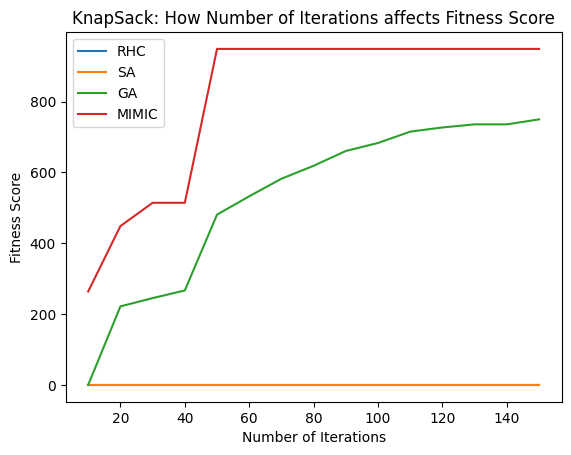

In [22]:
"""
Plotting the fitness score (Y axis) to iteration size (X axis) for KnapSack
"""

plt.plot(iteration_sizes, rhc_data_iteration_sizes, label = 'RHC')
plt.plot(iteration_sizes, sa_data_iteration_sizes, label = 'SA')
plt.plot(iteration_sizes, ga_data_iteration_sizes, label = 'GA')
plt.plot(iteration_sizes, mimic_data_iteration_sizes, label = 'MIMIC')

plt.xlabel("Number of Iterations")
plt.ylabel("Fitness Score")
plt.title("KnapSack: How Number of Iterations affects Fitness Score")
plt.legend()
plt.show()

# Generating the Number of FEvals with respect to Iterations

In [24]:
"""
Main custom runner for the KnapSack optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparameters All
max_weight_pct = 0.25
problem_size = 85

# Hyperparamters RHC
max_attempts_rhc = 100
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100

# Hyperparameters MIMIC
pop_size_mimic = 400
keep_pct = 0.8
max_attempts_mimic = 100
noise = 0.1

iteration_sizes = [1 * i for i in range(0, 160, 10)]
iteration_sizes.pop(0)

rhc_data_fevals = []
sa_data_fevals = []
ga_data_fevals = []
mimic_data_fevals = []

# Want to loop across the different problem sizes
for iteration_size in iteration_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    
    print(f"Running iteration size {iteration_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_weights = np.random.randint(1, problem_size, size=problem_size)
        initial_values = np.random.randint(1, problem_size, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.Knapsack(initial_weights, initial_values, max_weight_pct)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = 2
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=iteration_size,
            restarts=restarts,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(best_curve[-1][1])
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=iteration_size,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(best_curve[-1][1])
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=iteration_size,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(best_curve[-1][1])
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=iteration_size,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            random_state=seed,
            noise = noise
        )
        
        end = time.time()
        mimic_data_avg.append(best_curve[-1][1])
        
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC best avg fitness {rhc_avg}")
    rhc_data_fevals.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA best avg fitness {sa_avg}")
    sa_data_fevals.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA best avg fitness {ga_avg}")
    ga_data_fevals.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC best avg fitness {mimic_avg}")
    mimic_data_fevals.append(mimic_avg)
    
    print("====================================================")


Running iteration size 10!
RHC best avg fitness 10.0
SA best avg fitness 20.0
GA best avg fitness 2210.0
MIMIC best avg fitness 4410.0
Running iteration size 20!
RHC best avg fitness 20.0
SA best avg fitness 40.0
GA best avg fitness 4220.6
MIMIC best avg fitness 8420.0
Running iteration size 30!
RHC best avg fitness 30.0
SA best avg fitness 60.0
GA best avg fitness 6232.2
MIMIC best avg fitness 12430.0
Running iteration size 40!
RHC best avg fitness 40.0
SA best avg fitness 80.0
GA best avg fitness 8243.6
MIMIC best avg fitness 16440.0
Running iteration size 50!
RHC best avg fitness 50.0
SA best avg fitness 100.0
GA best avg fitness 10256.2
MIMIC best avg fitness 20450.0
Running iteration size 60!
RHC best avg fitness 60.0
SA best avg fitness 120.0
GA best avg fitness 12268.8
MIMIC best avg fitness 24460.4
Running iteration size 70!
RHC best avg fitness 70.0
SA best avg fitness 140.0
GA best avg fitness 14280.4
MIMIC best avg fitness 28470.4
Running iteration size 80!
RHC best avg fitn

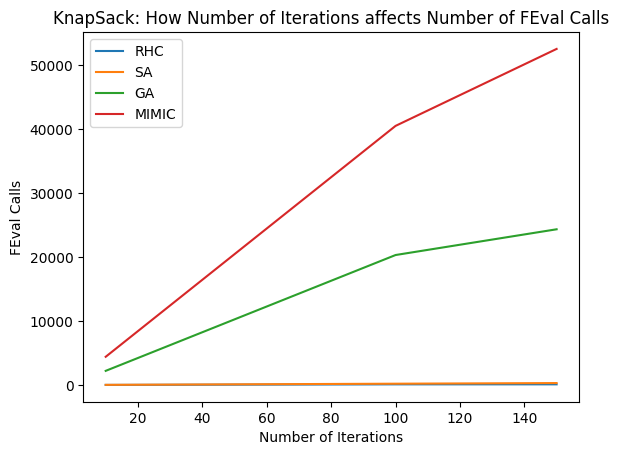

In [25]:
"""
Plotting the FEvals (Y axis) to iteration size (X axis) for KnapSack
"""

plt.plot(iteration_sizes, rhc_data_fevals, label = 'RHC')
plt.plot(iteration_sizes, sa_data_fevals, label = 'SA')
plt.plot(iteration_sizes, ga_data_fevals, label = 'GA')
plt.plot(iteration_sizes, mimic_data_fevals, label = 'MIMIC')

plt.xlabel("Number of Iterations")
plt.ylabel("FEval Calls")
plt.title("KnapSack: How Number of Iterations affects Number of FEval Calls")
plt.legend()
plt.show()

# Comparing the Wall Clock Times based off Iteration Number

In [26]:
"""
Main custom runner for the KnapSack optimization problem.

For this run, we just want to tune the hyperparameters to a good amount for the 
optimizations being done later.
"""

# Hyperparameters All
max_weight_pct = 0.25
problem_size = 85

# Hyperparamters RHC
max_attempts_rhc = 100
restarts = 25

# Hyperparameters SA
schedule = mlrose.ExpDecay()
max_attempts_sa = 100

# Hyperparameters GA
pop_size_ga = 200
mutation_prob = 0.1
max_attempts_ga = 100

# Hyperparameters MIMIC
pop_size_mimic = 400
keep_pct = 0.8
max_attempts_mimic = 100
noise = 0.1

iteration_sizes = [1 * i for i in range(0, 160, 10)]
iteration_sizes.pop(0)

rhc_data_clock = []
sa_data_clock = []
ga_data_clock = []
mimic_data_clock = []
wall_clock_time = []

# Want to loop across the different problem sizes
for iteration_size in iteration_sizes:
    rhc_data_avg = []
    sa_data_avg = []
    ga_data_avg = []
    mimic_data_avg = []
    avg_wall_clock_time = []
    
    print(f"Running iteration size {iteration_size}!")
    # Want to loop across the random seeds to set seed values for averaging
    for seed in seed_values:
        
        # Setting the seed values for random calls
        np.random.seed(seed)
        rn.seed(seed)
        os.environ['PYTHONHASHSEED'] = str(seed)
        
        # Generate the random initial state
        initial_weights = np.random.randint(1, problem_size, size=problem_size)
        initial_values = np.random.randint(1, problem_size, size=problem_size)
        
        # Create fitness function
        fitness = mlrose.Knapsack(initial_weights, initial_values, max_weight_pct)
        # Create Optimization Problem Object
        problem = mlrose.DiscreteOpt(
            length = problem_size,
            fitness_fn = fitness,
            maximize = True,
            max_val = 2
        )
        
        problem.set_mimic_fast_mode(True)
        
        # Running the actual RHO algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.random_hill_climb(
            problem=problem,
            max_attempts=max_attempts_rhc,
            max_iters=iteration_size,
            restarts=restarts,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        
        rhc_data_avg.append(end - start)
        
        problem.reset()
        
        # Running the actual SA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.simulated_annealing(
            problem=problem,
            schedule=schedule,
            max_attempts=max_attempts_sa,
            max_iters=iteration_size,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        sa_data_avg.append(end - start)
        
        problem.reset()
        
        # Running the actual GA algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.genetic_alg(
            problem=problem,
            max_attempts=max_attempts_ga,
            max_iters=iteration_size,
            pop_size=pop_size_ga,
            mutation_prob=mutation_prob,
            curve=True,
            random_state=seed
        )
        
        end = time.time()
        ga_data_avg.append(end - start)
        
        problem.reset()
        
         # Running the actual MIMIC algorithm while measuring times
        start = time.time()
        
        best_state, best_fitness, best_curve = mlrose.mimic(
            problem=problem,
            max_attempts=max_attempts_mimic,
            max_iters=iteration_size,
            pop_size=pop_size_mimic,
            keep_pct=keep_pct,
            curve=True,
            random_state=seed,
            noise = noise
        )
        
        end = time.time()
        mimic_data_avg.append(end - start)
        
        problem.reset()
    
    rhc_avg = np.average(rhc_data_avg)
    print(f"RHC best avg fitness {rhc_avg}")
    rhc_data_clock.append(rhc_avg)
    
    sa_avg = np.average(sa_data_avg)
    print(f"SA best avg fitness {sa_avg}")
    sa_data_clock.append(sa_avg)
    
    ga_avg = np.average(ga_data_avg)
    print(f"GA best avg fitness {ga_avg}")
    ga_data_clock.append(ga_avg)
    
    mimic_avg = np.average(mimic_data_avg)
    print(f"MIMIC best avg fitness {mimic_avg}")
    mimic_data_clock.append(mimic_avg)
    
    print("====================================================")


Running iteration size 10!
RHC best avg fitness 0.005168104171752929
SA best avg fitness 0.0003933429718017578
GA best avg fitness 0.0896988868713379
MIMIC best avg fitness 0.5331132411956787
Running iteration size 20!
RHC best avg fitness 0.009337568283081054
SA best avg fitness 0.0007118701934814454
GA best avg fitness 0.17097301483154298
MIMIC best avg fitness 1.0465962409973144
Running iteration size 30!
RHC best avg fitness 0.013681268692016602
SA best avg fitness 0.0010385990142822265
GA best avg fitness 0.25489068031311035
MIMIC best avg fitness 1.5612387657165527
Running iteration size 40!
RHC best avg fitness 0.018109130859375
SA best avg fitness 0.001356792449951172
GA best avg fitness 0.33972744941711425
MIMIC best avg fitness 2.080817937850952
Running iteration size 50!
RHC best avg fitness 0.022669315338134766
SA best avg fitness 0.0017019748687744141
GA best avg fitness 0.4255663871765137
MIMIC best avg fitness 2.599835920333862
Running iteration size 60!
RHC best avg fit

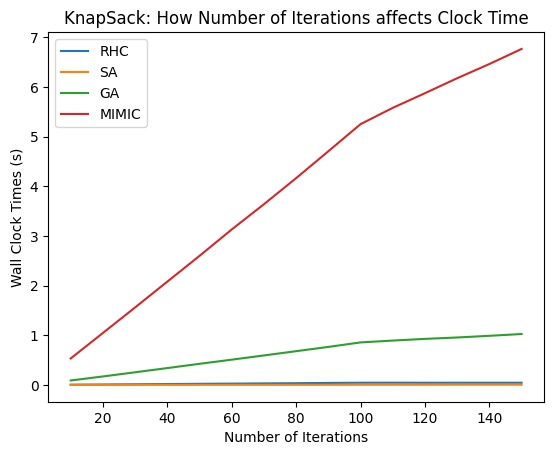

In [27]:
"""
Plotting the Clock Time (Y axis) to iteration size (X axis) for KnapSack
"""

plt.plot(iteration_sizes, rhc_data_clock, label = 'RHC')
plt.plot(iteration_sizes, sa_data_clock, label = 'SA')
plt.plot(iteration_sizes, ga_data_clock, label = 'GA')
plt.plot(iteration_sizes, mimic_data_clock, label = 'MIMIC')

plt.xlabel("Number of Iterations")
plt.ylabel("Wall Clock Times (s)")
plt.title("KnapSack: How Number of Iterations affects Clock Time")
plt.legend()
plt.show()